[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/OlivierGeorgeon/bac_a_sable/blob/master/logistic_regression.ipynb)

# Logistic regression

La régression logistique est une variante de le régressoin linéaire appliquée au cas ou les échantillons sont classés en seulement deux catégories (classement binaire). 

Ce tutoriel est basé sur https://www.python-engineer.com/courses/mlfromscratch/03_logisticregression/

La fonction linéaire est remplacée par une fonction en "S" appelée sigmoide qui représente la probabilité que l'échantillon appartienne à l'une ou l'autre des catégories:

![Linear to sigmoid](sigmoid.png)

Figure 1: les points rouge représentent les échantillons d'entrainement de catégorie 0, et les bleus ceux de catégorie 1. 
La sigmoide représente la courbe de régression qu'on cherche à apprendre. Elle donne la probabilité qu'un échantillons appartienne à la catégorie 1 en fonction de la valeur du *feature* x. Plus x est élevé, plus la probabilité que l'échantillon appartienne à la catégorie "1" est élevée.

La formule de la sigmoide est: 

$\hat y = h_0(x) = \frac{1}{1 + e^{-w.x + b}}$

## Sigmoid

Affichons une sigmoide simple

In [27]:
import numpy as np
import matplotlib.pyplot as plt

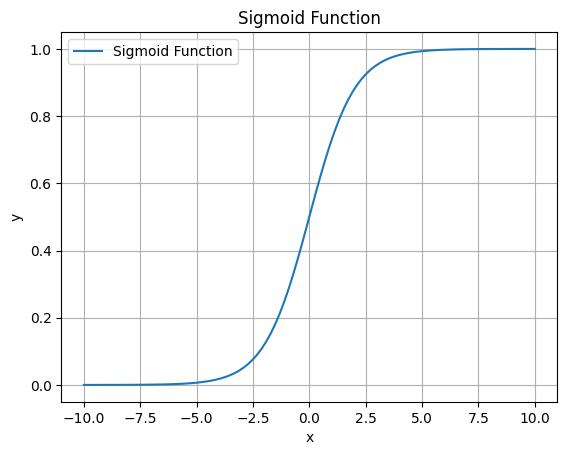

In [28]:
# Generate x values
x = np.linspace(-10, 10, 100)

# Generate y values using the sigmoid function
y = 1 / (1 + np.exp(-x))

# Create the plot
plt.plot(x, y, label='Sigmoid Function')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

## Gradient descent

Pour apprendre les paramètres $w$ et $b$ de la sigmoide, on la transforme en une droite en appliquant une fonction logarithmique.
Ensuite on applique la technique de régression linéaire sur cette droite.

![Linear to sigmoid](linear_to_logistic.png)

Figure 2: la sigmoide à gauche est transformée une une droite à droite.

La "fitness" de la sigmoide est calculée en projetant les échantillons connus sur la doite 

L'explication de cette transformation mathématique est donné ici https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html
Une bonne présentation vulgarisée: https://youtu.be/BfKanl1aSG0

## Update function

La *update function* ne change pas par rapport à la régression linéaire, sachant qu'on calcule maintenant la prédiction $\hat y$ avec la sigmoide:

$J'(w, b) = \begin{bmatrix} \frac{dJ}{dw} \\ \frac{dJ}{db} \end{bmatrix} = \begin{bmatrix} \frac{1}{N} \sum_{i=1}^{n} {2x_i(\hat y - y_i)} \\ \frac{1}{N} \sum_{i=1}^{n} {2(\hat y - y_i)} \end{bmatrix}$

L'implémentation devient donc:

In [30]:
class LogisticRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))


On teste en utilisant des données de sklearn sur le cancer du sein

In [16]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn import datasets

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

regressor = LogisticRegression(learning_rate=0.0001, n_iters=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

Regardons la taille de notre échantillon: 

In [21]:
print(f"Nombre d'échantillons d'entrainenement: {X_train.shape[0]}, Nombre de features: {X_train.shape[1]}")

Nombre d'échantillons d'entrainenement: 455, Nombre de features: 30


Calculons la *accuracy* sur l'échantillon de test

In [14]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

print("LR classification accuracy:", accuracy(y_test, predictions))

LR classification accuracy: 0.9298245614035088


# Sujet du TP

Trouver un learning rate et un nombre d'itérations qui optimisent l'apprentissage 

Une fois l'apprentissage effectué. Vérifier la prédiction pour quelques exemples de $x$. 

Expliquez ce que vous avez fait